In [1]:
import numpy as np
import pandas as pd
housing = pd.read_csv("C:\\Users\\User\\Downloads\\housing.csv") # Import the dataset
housing.head() # Shows first 5 rows and if you want the name of the columns do df.columns

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing.info() # Shows a consice summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing.isnull().sum() # Shows the null value counts for each column

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
housing.dropna(inplace=True) # Drops the columns that contain null values
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [5]:
housing.ocean_proximity.value_counts() 

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# Since ocean proximity is non-numerical, change each category to a number
housing['ocean_proximity'] = housing['ocean_proximity'].replace({'<1H OCEAN': 0,'INLAND': 1,'NEAR OCEAN': 2,
'NEAR BAY': 3,'ISLAND': 4})

print(housing['ocean_proximity'].value_counts())

0    9034
1    6496
2    2628
3    2270
4       5
Name: ocean_proximity, dtype: int64


In [7]:
# Add new columns for rooms per household, beedroms per room, population per household
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467


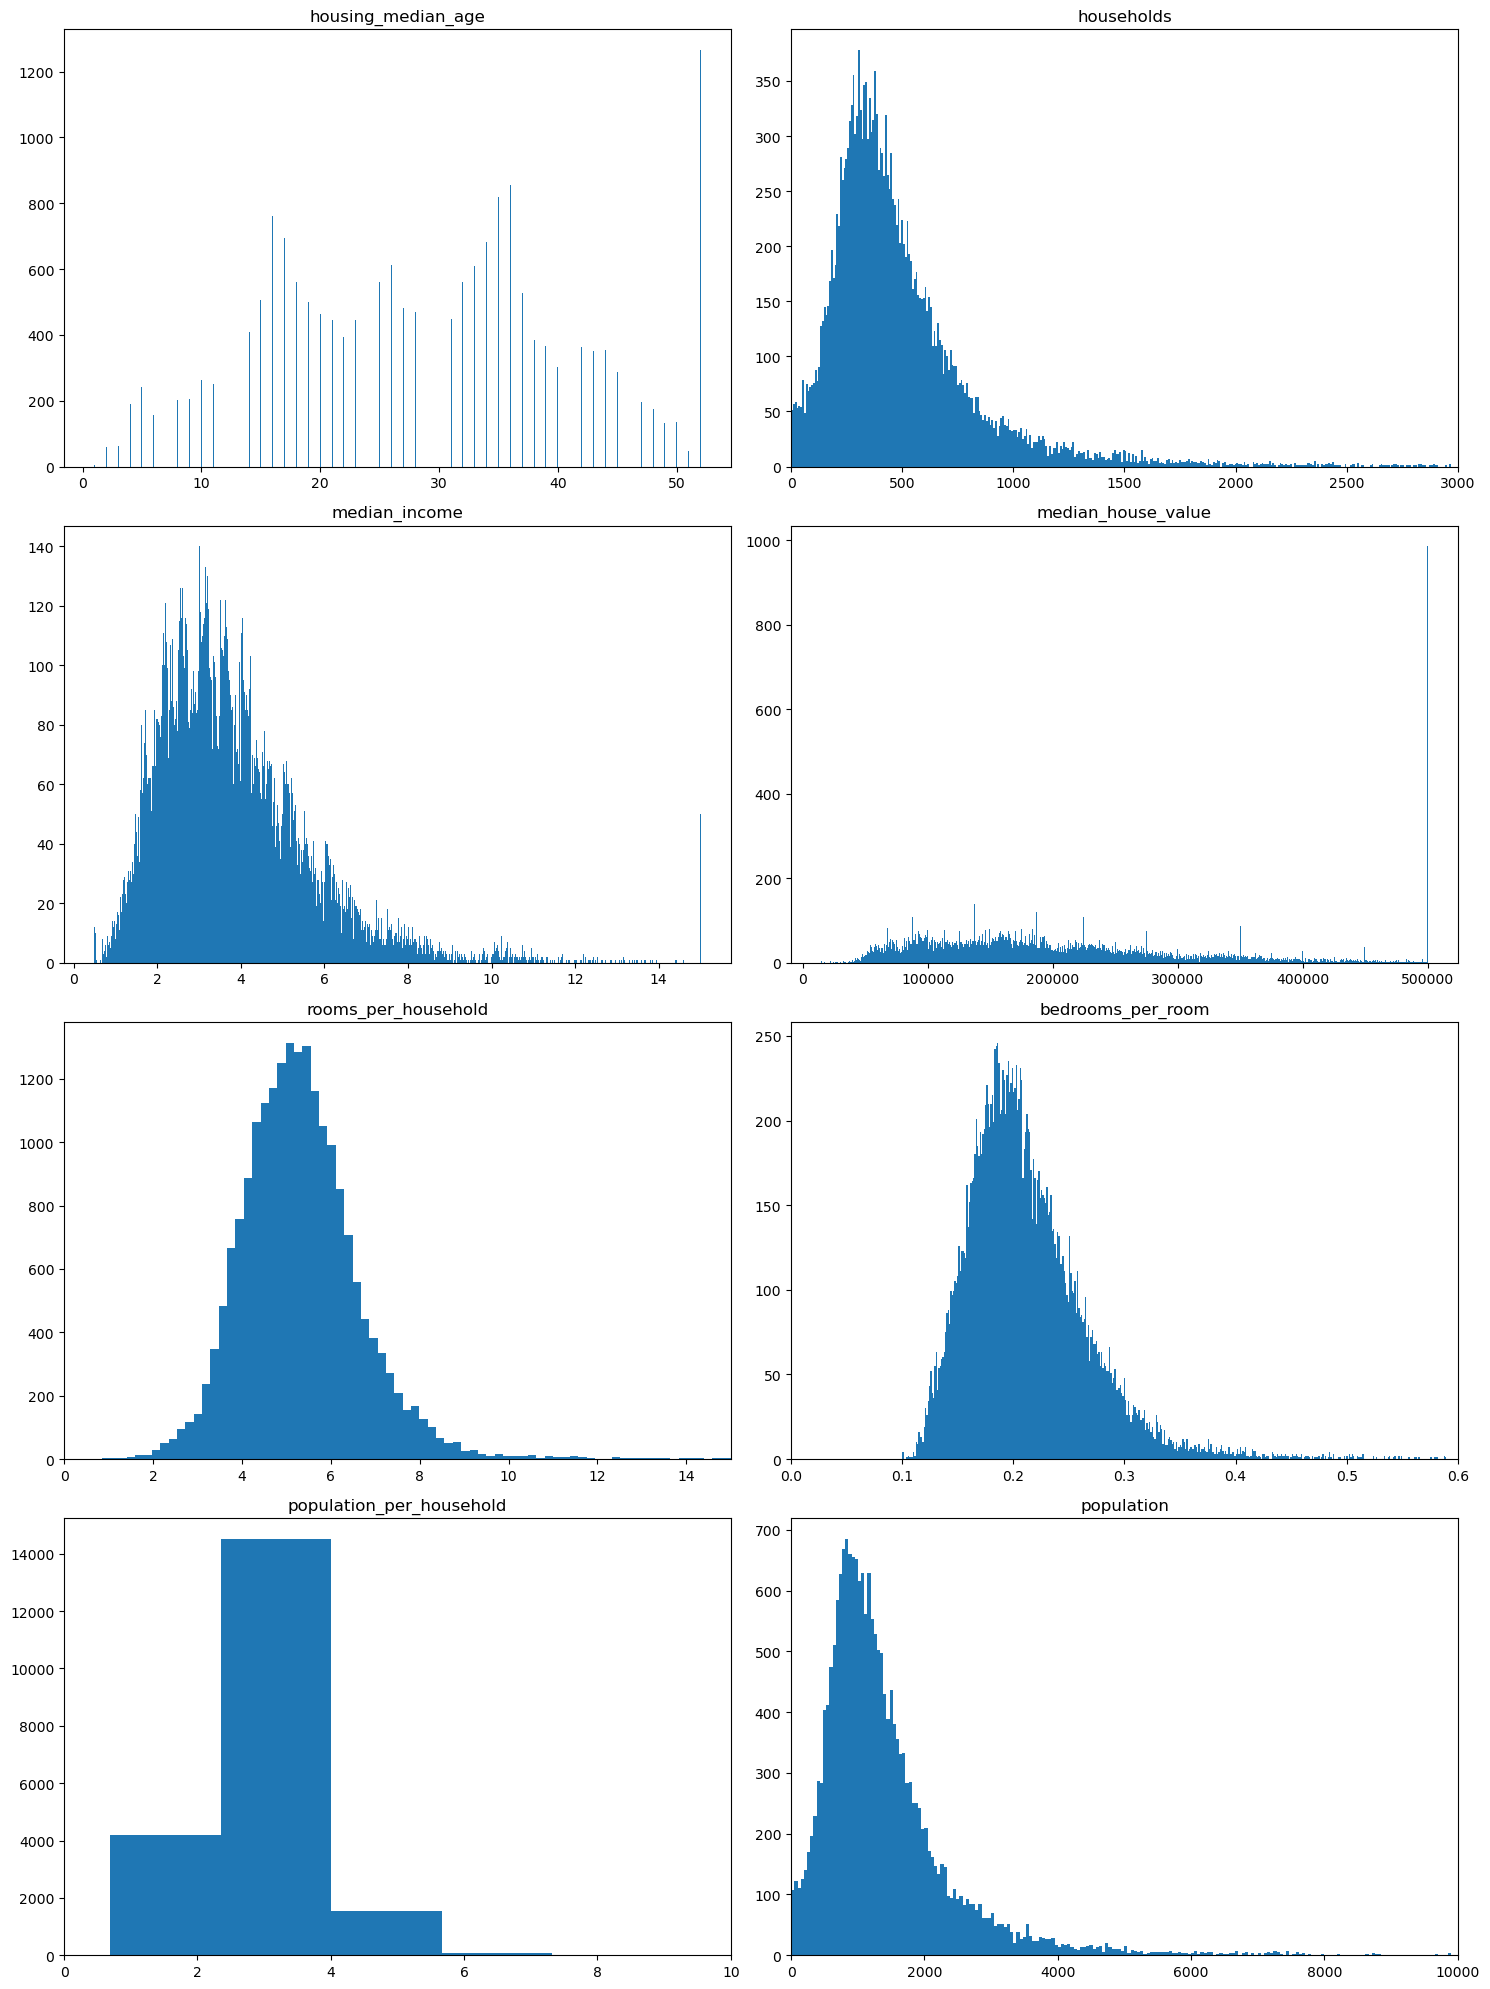

In [8]:
# Display histograms of the different columns
import matplotlib.pyplot as plt

columns_to_plot = ['housing_median_age','households','median_income','median_house_value','rooms_per_household',
'bedrooms_per_room', 'population_per_household', 'population']

ranges = {'households': (0, 3000),'rooms_per_household': (0, 15),'population_per_household': (0, 10),
'population': (0, 10000),'bedrooms_per_room': (0, 0.6)}

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

for ax, column in zip(axes.flatten(), columns_to_plot):
    ax.hist(housing[column], bins=750)
    ax.set_title(column)

    if column in ranges:
        ax.set_xlim(ranges[column])

plt.tight_layout()
plt.show()

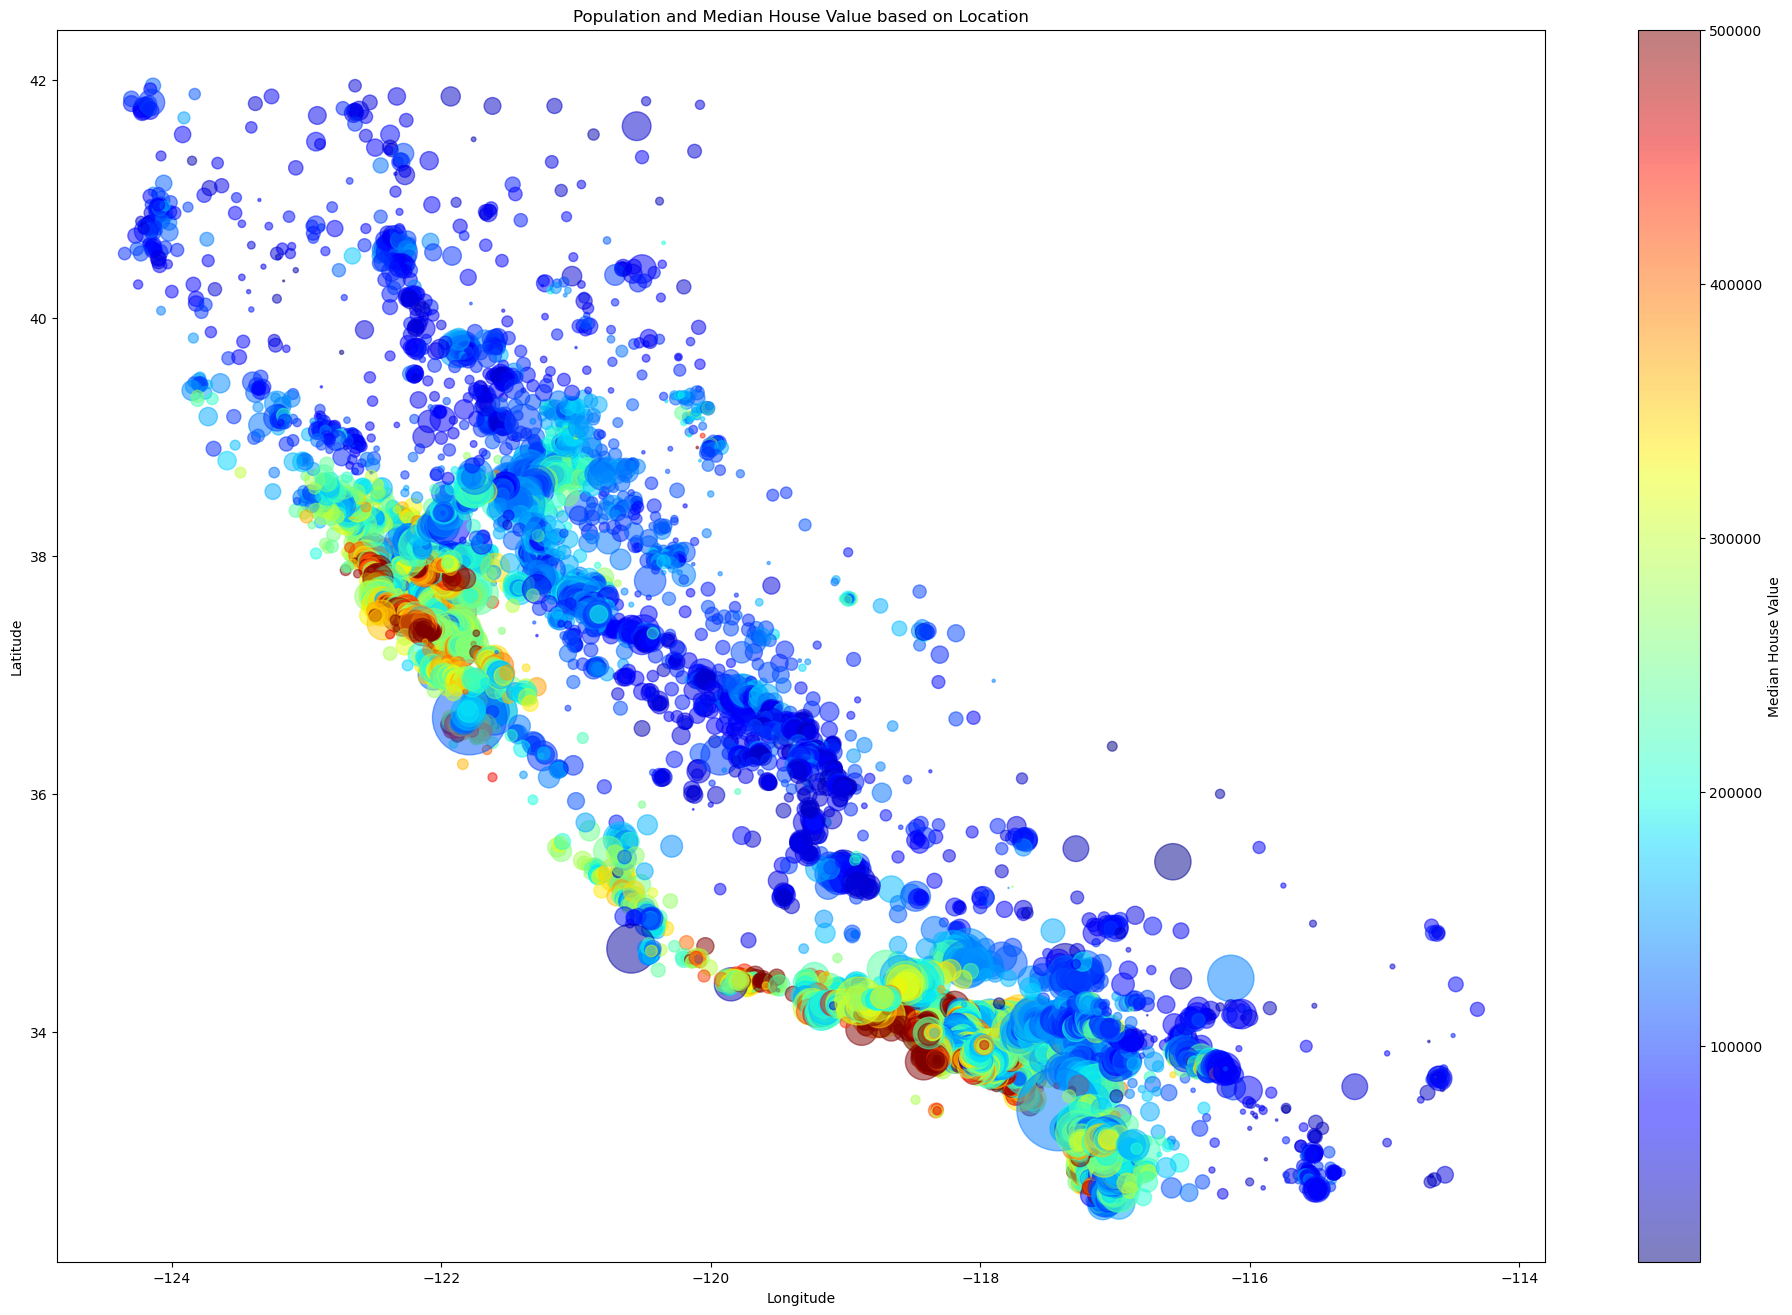

In [9]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 16))

scatter = plt.scatter(x=housing['longitude'], y=housing['latitude'], alpha=0.5, s=housing['population']/10, 
                      c=housing['median_house_value'], cmap=plt.get_cmap('jet'))

plt.colorbar(scatter, label='Median House Value')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Population and Median House Value based on Location')
plt.show()

In [10]:
# Select features for linear regression model
X=housing[["longitude","latitude", "housing_median_age", "total_rooms","total_bedrooms","population","households",
           "median_income","population_per_household","bedrooms_per_room","rooms_per_household"]]
Y=housing["median_house_value"]

In [11]:
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from pandas import read_csv
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error
import numpy as np

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=32)

reg=LinearRegression()
reg.fit(X_train,y_train)

yPred=(reg.predict(X_test))

print("RSME:",sqrt(mean_squared_error(y_test,yPred)))#Root-mean-square deviation(RSME)
print("R²:", reg.score(X_test,y_test))

RSME: 67789.73425094195
R²: 0.6548286711147645


In [12]:
corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.688355
rooms_per_household         0.151344
total_rooms                 0.133294
housing_median_age          0.106432
households                  0.064894
total_bedrooms              0.049686
ocean_proximity             0.020952
population_per_household   -0.023639
population                 -0.025300
longitude                  -0.045398
latitude                   -0.144638
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64


In [13]:
coefficients = reg.coef_
intercept = reg.intercept_

features = X_train.columns

equation = "y = "

for i, coef in enumerate(coefficients):
    equation += f"{coef:.2f}*{features[i]} + "

equation += f"{intercept:.2f}"

print(equation)

y = -42910.13*longitude + -42378.54*latitude + 1116.95*housing_median_age + 3.08*total_rooms + 10.87*total_bedrooms + -37.31*population + 96.26*households + 41360.35*median_income + 30.92*population_per_household + 292313.20*bedrooms_per_room + 2765.78*rooms_per_household + -3692254.21


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=32)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

# Applying Differential Privacy - Laplace Mechanism
epsilon = 0.00001  # Privacy parameter, adjust as needed (Smaller epsilon means greater privacy)
sensitivity = 1  # Sensitivity of the function, needs proper calculation

# Adding Laplace noise to the predictions
noise = np.random.laplace(0, sensitivity/epsilon, y_pred.shape)
y_pred_private = y_pred + noise

# Evaluate the privacy-preserving model
rmse_private = sqrt(mean_squared_error(y_test, y_pred_private))
r_squared_private = reg.score(X_test, y_pred_private)

print("RSME (Epsilon: 0.00001):", rmse_private)
print("R² (Epsilon: 0.00001):", r_squared_private)

RSME (Epsilon: 0.00001): 155107.6968586644
R² (Epsilon: 0.00001): 0.2960482350969359


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=32)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

epsilon = 0.0001  #Change the epsilon to 0.001 (Higher epsilon means less privacy)
sensitivity = 1 

noise = np.random.laplace(0, sensitivity/epsilon, y_pred.shape)
y_pred_private = y_pred + noise

rmse_private = sqrt(mean_squared_error(y_test, y_pred_private))
r_squared_private = reg.score(X_test, y_pred_private)

print("RSME (Epsilon: 0.0001):", rmse_private)
print("R² (Epsilon: 0.0001):", r_squared_private)

RSME (Epsilon: 0.0001): 69295.95891123891
R² (Epsilon: 0.0001): 0.977125316540538


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=32)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

epsilon = 0.001  #Change epsilon to 0.001
sensitivity = 1 

noise = np.random.laplace(0, sensitivity/epsilon, y_pred.shape)
y_pred_private = y_pred + noise

rmse_private = sqrt(mean_squared_error(y_test, y_pred_private))
r_squared_private = reg.score(X_test, y_pred_private)

print("RSME (Epsilon: 0.001):", rmse_private)
print("R² (Epsilon: 0.001):", r_squared_private)

RSME (Epsilon: 0.001): 67786.9330250266
R² (Epsilon: 0.001): 0.9997700222572233


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=32)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

epsilon = 0.0000215  #Change epsilon to 0.001
sensitivity = 1 

noise = np.random.laplace(0, sensitivity/epsilon, y_pred.shape)
y_pred_private = y_pred + noise

rmse_private = sqrt(mean_squared_error(y_test, y_pred_private))
r_squared_private = reg.score(X_test, y_pred_private)

print("RSME (Epsilon: 0.0000215):", rmse_private)
print("R² (Epsilon: 0.0000215):", r_squared_private)

RSME (Epsilon: 0.0000215): 95365.62778036711
R² (Epsilon: 0.0000215): 0.6457564198686008
